<h1>Regresión Logistica: Detección Cancer de Mama</h1>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<h2>Cargar y explorar Datos</h2>

In [2]:
df_raw = pd.read_csv('.\data.csv')
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df_raw.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df_raw.drop(['Unnamed: 32'], axis=1, inplace=True)

In [5]:
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df_raw.drop_duplicates(inplace=True)

In [7]:
df_raw['diagnosis'].replace(to_replace='M', value=1, inplace=True)
df_raw['diagnosis'].replace(to_replace='B', value=0, inplace=True)

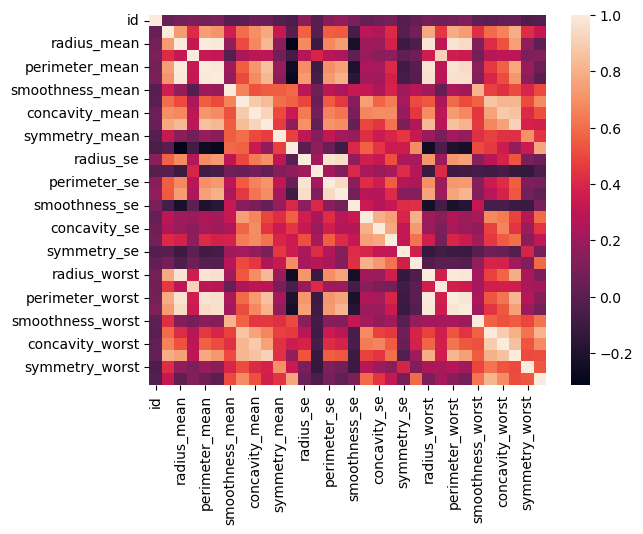

In [8]:
sns.heatmap(df_raw.corr())
plt.show()

In [9]:
df = df_raw.iloc[:,:12]
df_se = df_raw[['diagnosis','radius_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'symmetry_se']]
df_worst = df_raw.iloc[:,22:]
df_worst['diagnosis'] = df_raw['diagnosis']

In [10]:
df.drop('perimeter_mean', axis=1, inplace=True)

In [11]:
df.drop('area_mean', axis=1, inplace=True)

In [20]:
df.drop('id', axis=1, inplace=True)

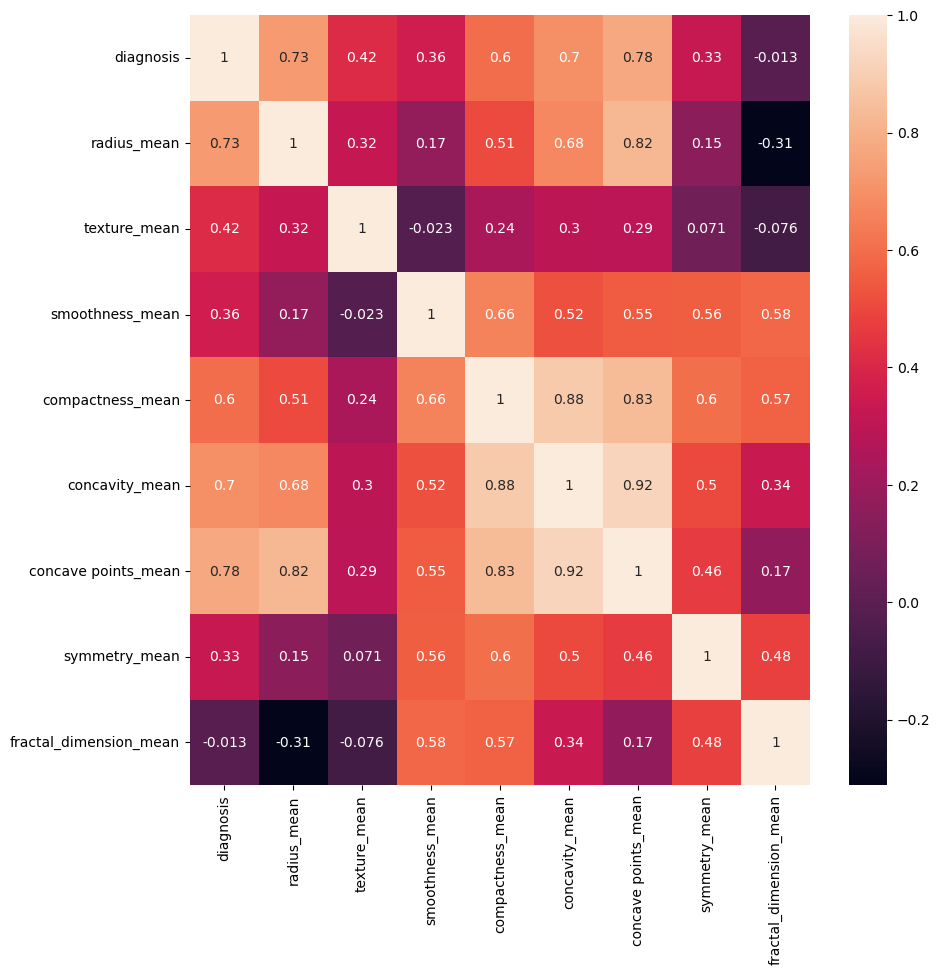

In [21]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

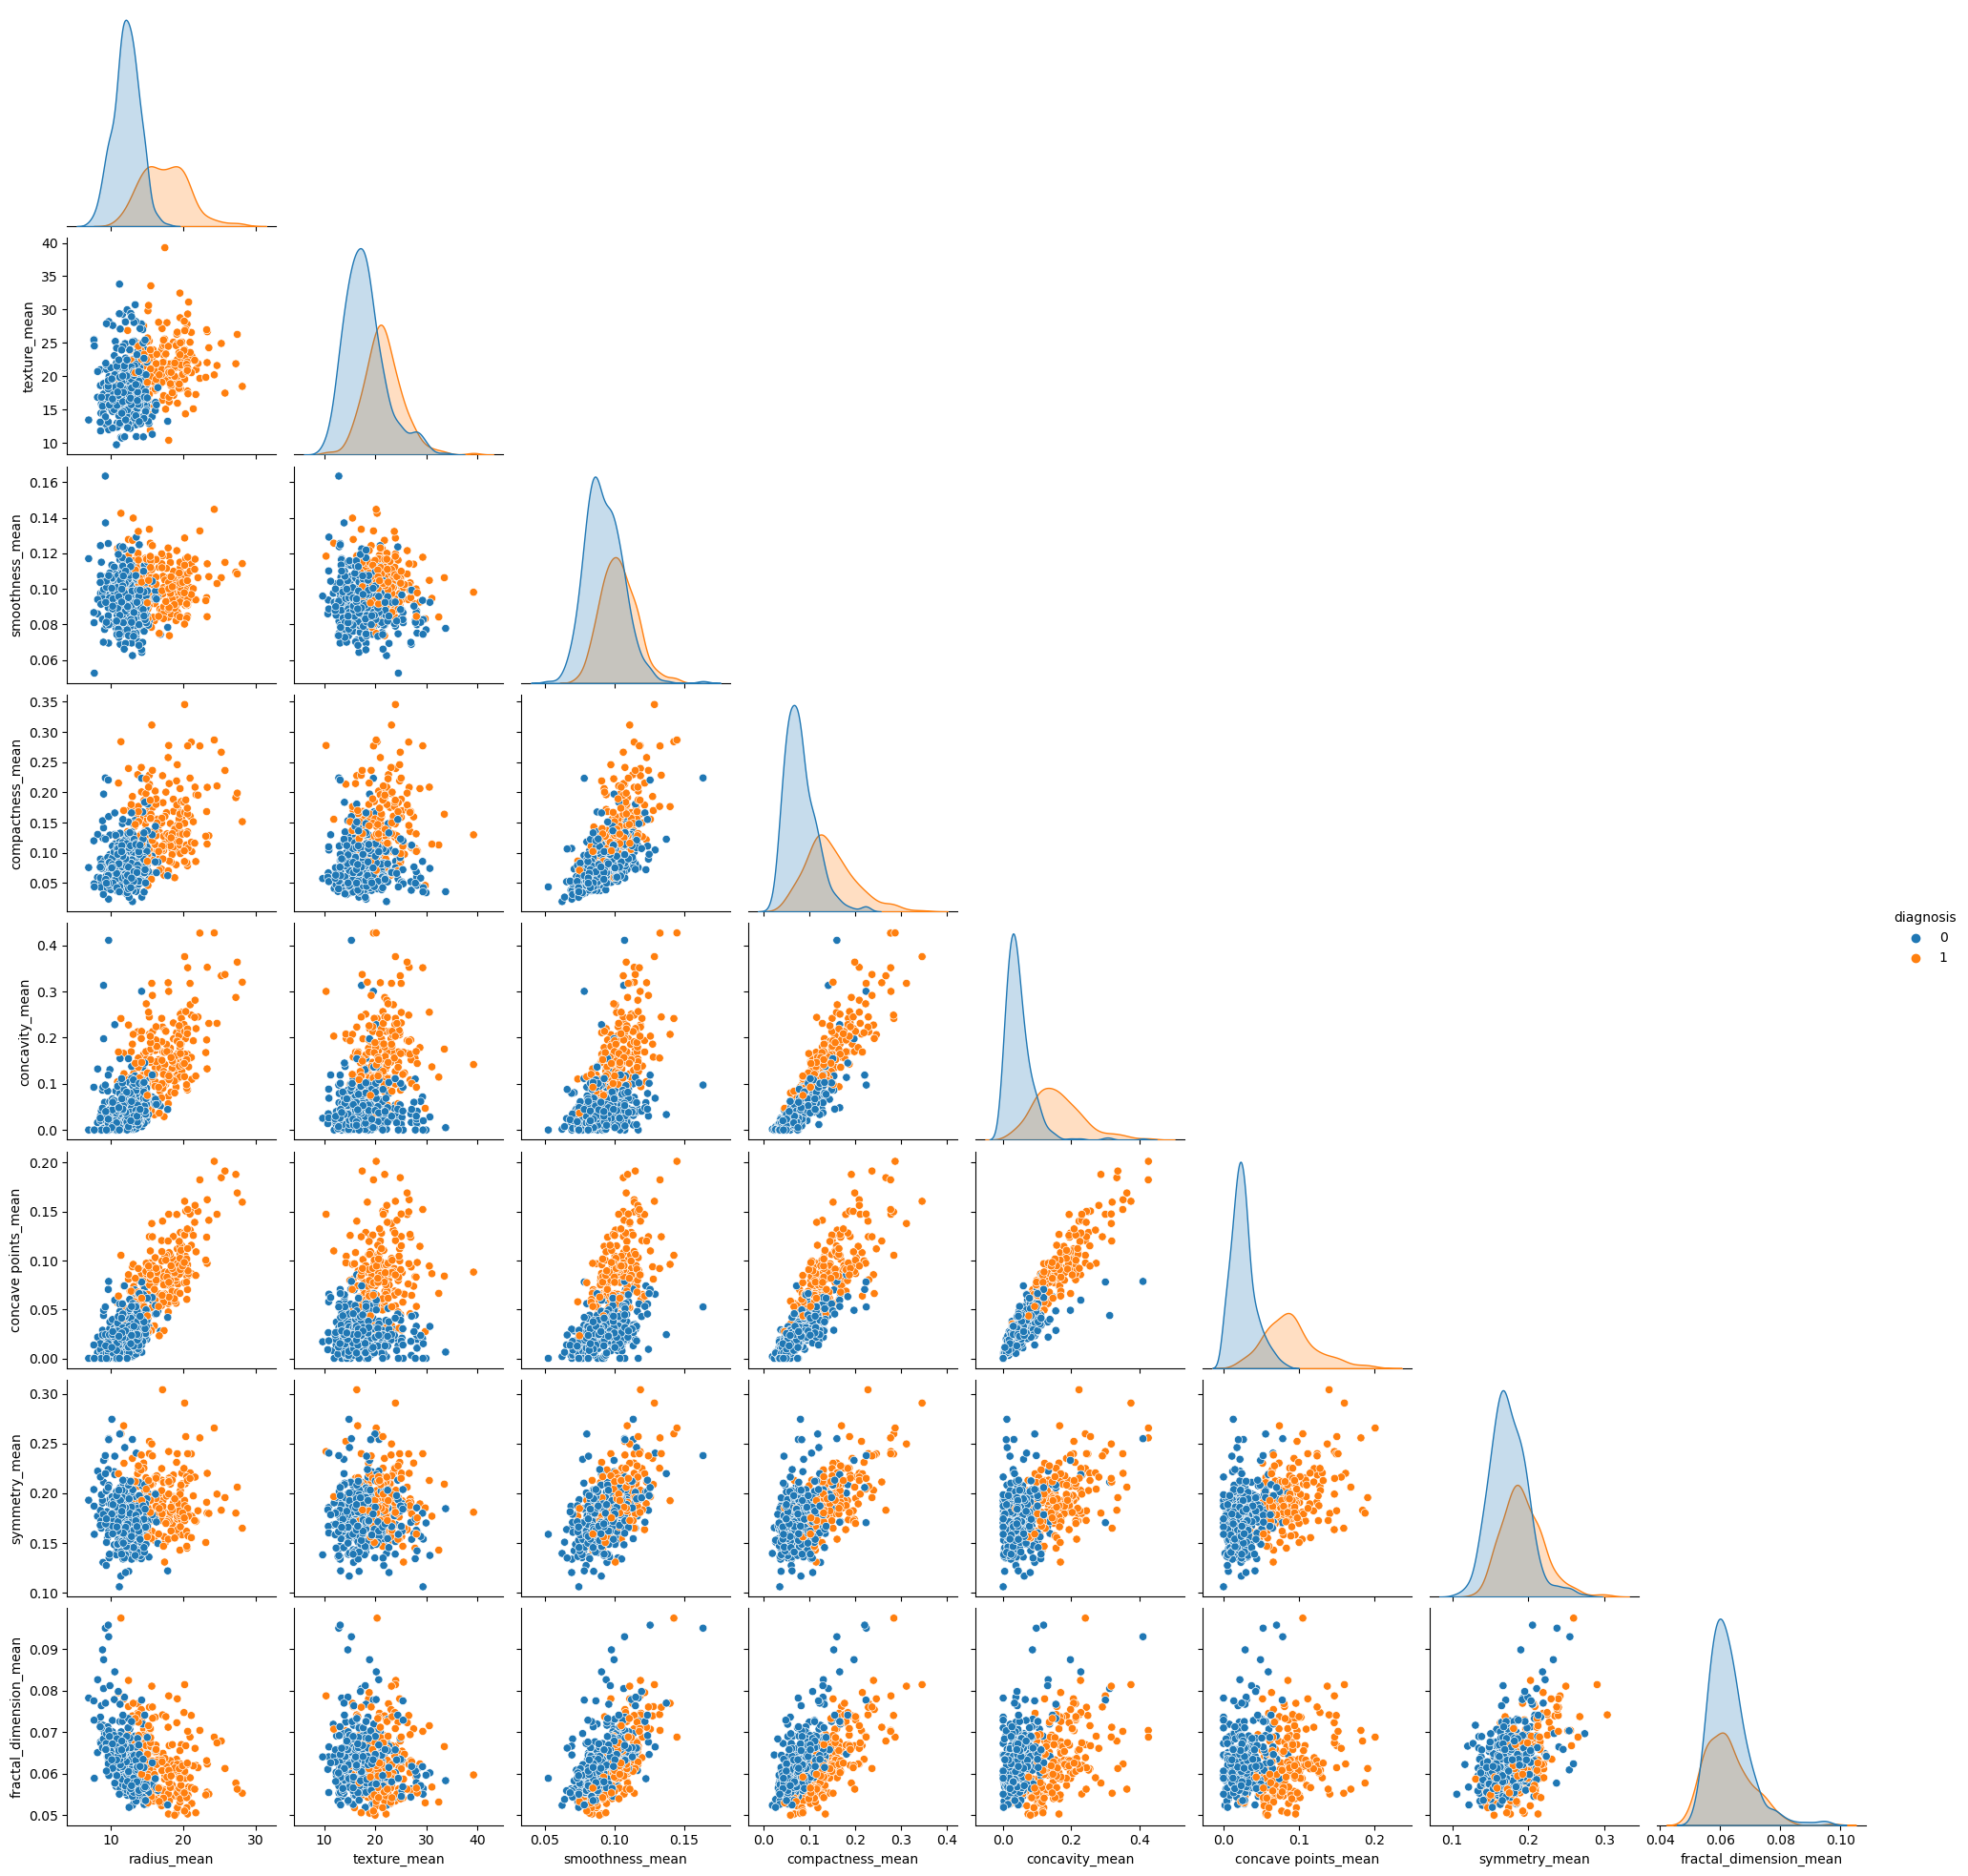

In [22]:
sns.pairplot(df, hue='diagnosis', corner=True)
plt.show()

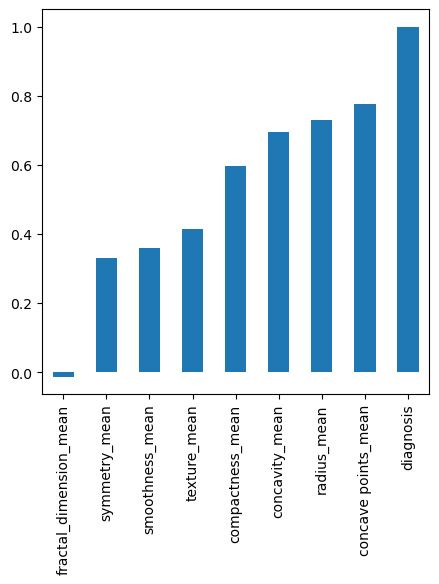

In [23]:
fig = plt.figure(figsize=(5,5))
df.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

<h2>Procesar y separar datos </h2>

In [24]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.2)

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<h2>Modelo</h2>

In [41]:
LR = LogisticRegression()
result = LR.fit(x_train, y_train)
pred = LR.predict(x_test)

<h2>Evaluar el modelo</h2>

In [42]:
accuracy = round(accuracy_score(y_test, pred), 4)*100
print(f'Predice con un {accuracy}% de accuracy')

Predice con un 93.86% de accuracy


AxesSubplot(0.125,0.11;0.775x0.77)


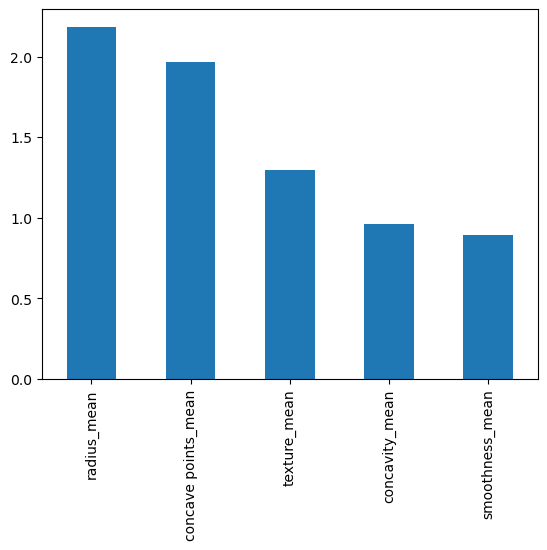

In [44]:
weights = pd.Series(LR.coef_[0], index = x.columns.values)
print(weights.sort_values(ascending=False)[:5].plot(kind='bar'))
plt.show()

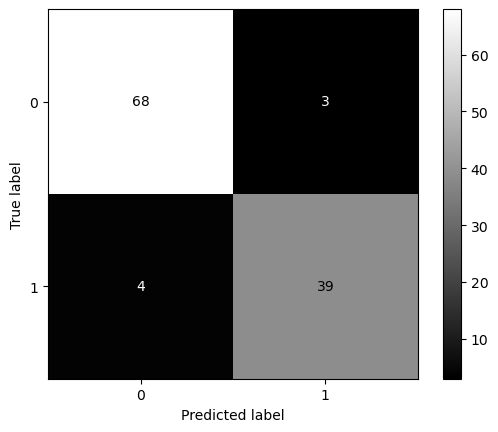

In [47]:
cm = confusion_matrix(y_test, pred, labels = LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LR.classes_)
disp.plot(cmap='gray')